In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import torch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [71]:

import pandas as pd

# Load the dataset
file_path = "final_data.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Data types and missing values
print(df.head())  # First few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pH                     999 non-null    float64
 1   N                      999 non-null    float64
 2   P                      999 non-null    float64
 3   K                      999 non-null    float64
 4   OC                     999 non-null    float64
 5   Particles              999 non-null    float64
 6   Water_holding_content  999 non-null    float64
 7   Soil_type              999 non-null    object 
 8   crop_type              999 non-null    object 
dtypes: float64(7), object(2)
memory usage: 70.4+ KB
None
     pH       N      P       K    OC  Particles  Water_holding_content  \
0  7.03  118.72  25.00  185.82  0.78   0.001686                   1.40   
1  2.57  131.09  24.62  181.71  0.90   0.000381                   1.31   
2  3.39  104.32  18.37  202.39  0.76   0.000

In [72]:
# Check for missing values
print(df.isnull().sum())




pH                       0
N                        0
P                        0
K                        0
OC                       0
Particles                0
Water_holding_content    0
Soil_type                0
crop_type                0
dtype: int64


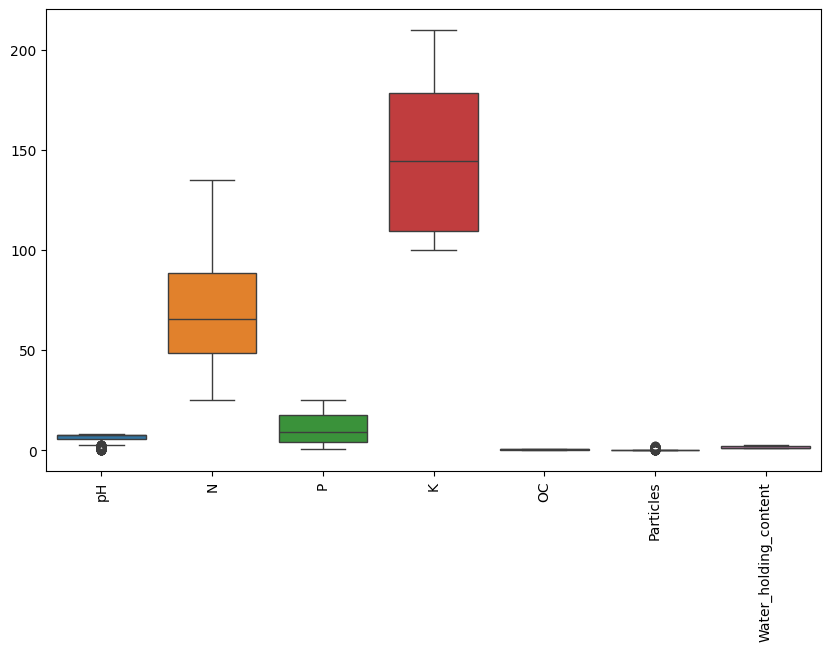

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [74]:
# Display summary statistics
print(df.describe())

# Show unique values for categorical columns
print(df["Soil_type"].unique())
print(df["crop_type"].unique())

               pH           N           P           K          OC   Particles  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean     6.498879   69.971431   10.946186  146.753734    0.503173    0.269286   
std      2.178742   28.300420    7.517791   35.535056    0.266441    0.511614   
min      0.030000   25.060000    0.610000  100.040000    0.010000    0.000017   
25%      5.755000   48.895000    4.375000  109.640000    0.290000    0.001569   
50%      7.630000   65.510000    9.270000  144.330000    0.510000    0.023609   
75%      7.820000   88.405000   17.760000  178.750000    0.730000    0.115000   
max      8.000000  134.860000   25.000000  209.810000    0.950000    1.990000   

       Water_holding_content  
count             999.000000  
mean                1.722392  
std                 0.462599  
min                 1.200000  
25%                 1.320000  
50%                 1.430000  
75%                 2.210000  
max                 2.

In [75]:
# Display summary statistics
print(df.describe())

# Show unique values for categorical columns
print(df["Soil_type"].unique())
print(df["crop_type"].unique())

               pH           N           P           K          OC   Particles  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean     6.498879   69.971431   10.946186  146.753734    0.503173    0.269286   
std      2.178742   28.300420    7.517791   35.535056    0.266441    0.511614   
min      0.030000   25.060000    0.610000  100.040000    0.010000    0.000017   
25%      5.755000   48.895000    4.375000  109.640000    0.290000    0.001569   
50%      7.630000   65.510000    9.270000  144.330000    0.510000    0.023609   
75%      7.820000   88.405000   17.760000  178.750000    0.730000    0.115000   
max      8.000000  134.860000   25.000000  209.810000    0.950000    1.990000   

       Water_holding_content  
count             999.000000  
mean                1.722392  
std                 0.462599  
min                 1.200000  
25%                 1.320000  
50%                 1.430000  
75%                 2.210000  
max                 2.

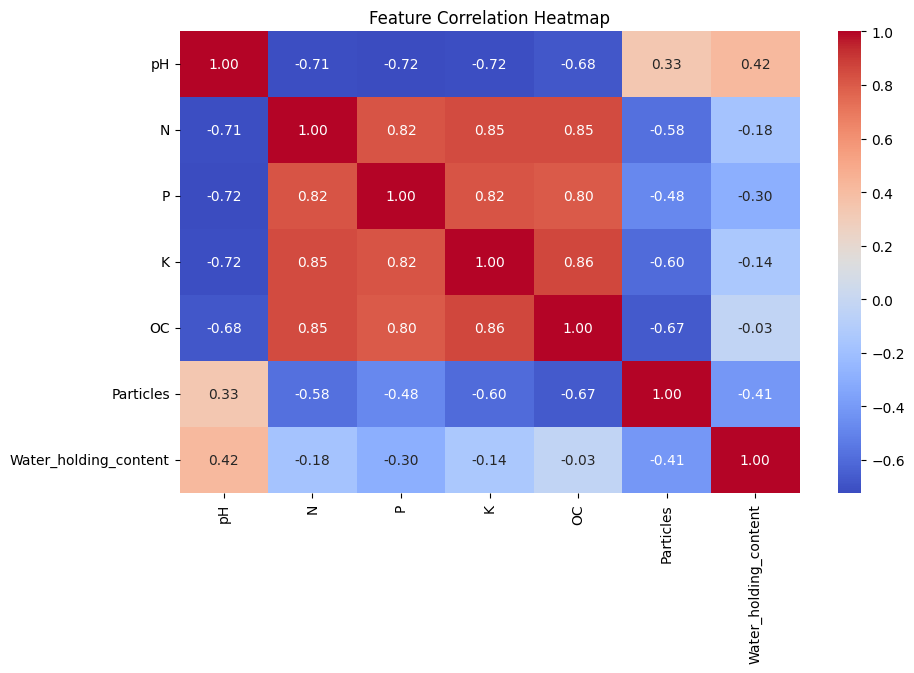

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

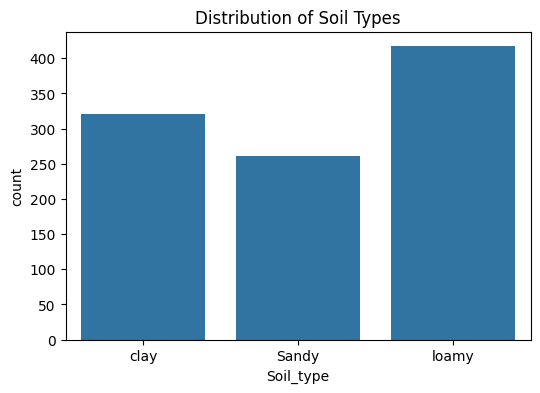

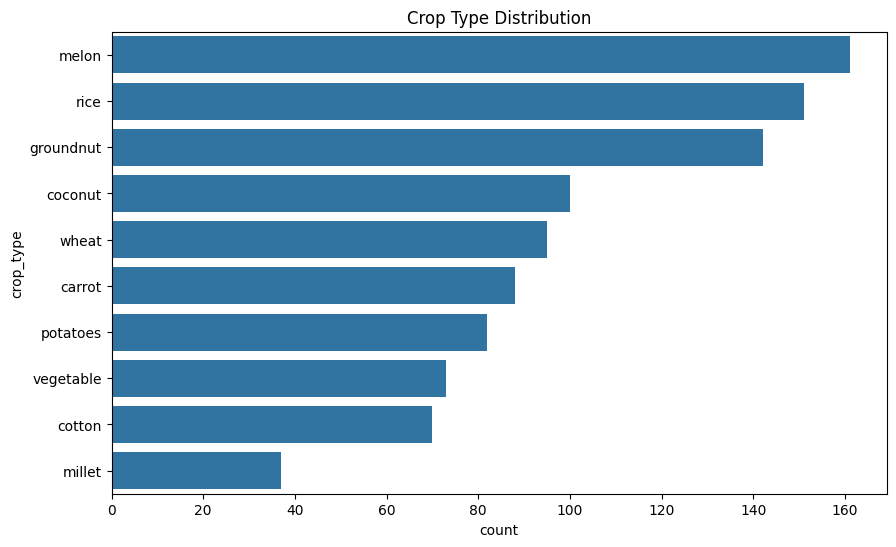

In [77]:
# Count plot of Soil Types
plt.figure(figsize=(6,4))
sns.countplot(x="Soil_type", data=df)
plt.title("Distribution of Soil Types")
plt.show()

# Count plot of Crop Types
plt.figure(figsize=(10,6))
sns.countplot(y="crop_type", data=df, order=df["crop_type"].value_counts().index)
plt.title("Crop Type Distribution")
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop(columns=["crop_type"])  # Features
y = df["crop_type"]  # Target

# Define categorical and numerical columns
num_cols = ["pH", "N", "P", "K", "OC", "Particles", "Water_holding_content"]
cat_cols = ["Soil_type"]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

# Transform data
X_processed = preprocessor.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset shape
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (799, 10), Test Shape: (200, 10)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test,y_pred))

Model Accuracy: 0.46
Classification Report:
               precision    recall  f1-score   support

      carrot       0.43      0.17      0.24        18
     coconut       0.45      0.25      0.32        20
      cotton       0.20      0.07      0.11        14
   groundnut       0.40      0.72      0.52        29
       melon       0.63      0.81      0.71        32
      millet       0.00      0.00      0.00         7
    potatoes       0.17      0.06      0.09        16
        rice       0.49      0.83      0.62        30
   vegetable       0.33      0.20      0.25        15
       wheat       0.33      0.32      0.32        19

    accuracy                           0.46       200
   macro avg       0.34      0.34      0.32       200
weighted avg       0.40      0.46      0.40       200



c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
import pickle

# Save the trained model
with open("crop_recommendation_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Load the model for future use
with open("crop_recommendation_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

In [81]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assuming you have your data as X_train, X_test, y_train, and y_test
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels (y_train and y_test)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define your models (assuming you have the models dictionary)
models = {
    'XGBoost': xgb.XGBClassifier()
    # Add other models here if necessary
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  # Train model with encoded labels

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")

    # If you want to decode the predictions back to original labels
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    print(f"Decoded Predictions: {y_pred_decoded[:10]}")  # Show the first 10 predictions



Training XGBoost...
Accuracy of XGBoost: 0.3850
Decoded Predictions: ['wheat' 'groundnut' 'rice' 'groundnut' 'potatoes' 'coconut' 'groundnut'
 'wheat' 'groundnut' 'melon']


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming you have already defined your features (X_train, X_test) and target (y_train, y_test)

# Label encode the target labels if they are categorical (e.g., 'carrot', 'coconut', etc.)
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform y_test
y_test_encoded = label_encoder.transform(y_test)

# Define different models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(kernel='rbf', probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  # Train model with encoded labels
    
    y_pred = model.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {name}:\n", classification_report(y_test_encoded, y_pred))



Training RandomForest...
RandomForest Accuracy: 0.46
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.43      0.17      0.24        18
           1       0.45      0.25      0.32        20
           2       0.20      0.07      0.11        14
           3       0.40      0.72      0.52        29
           4       0.63      0.81      0.71        32
           5       0.00      0.00      0.00         7
           6       0.17      0.06      0.09        16
           7       0.49      0.83      0.62        30
           8       0.33      0.20      0.25        15
           9       0.33      0.32      0.32        19

    accuracy                           0.46       200
   macro avg       0.34      0.34      0.32       200
weighted avg       0.40      0.46      0.40       200


Training XGBoost...


c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:50] 

XGBoost Accuracy: 0.39
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.11      0.06      0.07        18
           1       0.43      0.30      0.35        20
           2       0.25      0.07      0.11        14
           3       0.38      0.59      0.46        29
           4       0.63      0.75      0.69        32
           5       0.00      0.00      0.00         7
           6       0.13      0.12      0.13        16
           7       0.42      0.57      0.49        30
           8       0.18      0.13      0.15        15
           9       0.29      0.37      0.33        19

    accuracy                           0.39       200
   macro avg       0.28      0.30      0.28       200
weighted avg       0.34      0.39      0.35       200


Training SVM...
SVM Accuracy: 0.46
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
     

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde

In [83]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the categorical labels into numeric labels
y_encoded = label_encoder.fit_transform(y)

# Now, train the model with the encoded labels
model.fit(X_processed, y_encoded)


LogisticRegression(max_iter=500)

In [84]:
y_pred = model.predict(X_processed)  # Model prediction
y_pred_labels = label_encoder.inverse_transform(y_pred)  # Convert numeric predictions back to string labels


In [87]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Assuming you have your features (X_processed) and target (y)
# Example of your target variable y with string labels
y = ['carrot', 'coconut', 'cotton', 'groundnut', 'melon', 'millet', 'potatoes', 'rice', 'vegetable', 'wheat']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels into numeric labels
y_encoded = label_encoder.fit_transform(y)

# Check if y_encoded matches the number of rows in X_processed
print("Shape of X_processed:", X_processed.shape)
print("Length of y_encoded:", len(y_encoded))

# Ensure the number of samples in X_processed matches the number of target labels in y_encoded
if X_processed.shape[0] == len(y_encoded):
    # Your XGBoost model (assuming it's already defined)
    model = xgb.XGBClassifier()

    # Fit the model with the processed data (X_processed) and encoded target labels (y_encoded)
    model.fit(X_processed, y_encoded)

    # If you want to make predictions and convert numeric predictions back to original labels:
    y_pred = model.predict(X_processed)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    # Print or use predictions in their original string form
    print("Predictions in original labels:", y_pred_labels)
else:
    print("Mismatch in the number of samples between X_processed and y_encoded. Please check your data.")


Shape of X_processed: (999, 10)
Length of y_encoded: 10
Mismatch in the number of samples between X_processed and y_encoded. Please check your data.


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming you have already defined your features (X_train, X_test) and target (y_train, y_test)

# Label encode the target labels if they are categorical (e.g., 'carrot', 'coconut', etc.)
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform y_test
y_test_encoded = label_encoder.transform(y_test)

# Define different models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(kernel='rbf', probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  # Train model with encoded labels
    
    y_pred = model.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Print Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test_encoded, y_pred))
    
    # Print Confusion Matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)



Training RandomForest...
RandomForest Accuracy: 0.46
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.43      0.17      0.24        18
           1       0.45      0.25      0.32        20
           2       0.20      0.07      0.11        14
           3       0.40      0.72      0.52        29
           4       0.63      0.81      0.71        32
           5       0.00      0.00      0.00         7
           6       0.17      0.06      0.09        16
           7       0.49      0.83      0.62        30
           8       0.33      0.20      0.25        15
           9       0.33      0.32      0.32        19

    accuracy                           0.46       200
   macro avg       0.34      0.34      0.32       200
weighted avg       0.40      0.46      0.40       200

Confusion Matrix for RandomForest:
 [[ 3  0  0  0  0  0  2 13  0  0]
 [ 0  5  0  0 15  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  1  2]
 [ 0  0  1 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:12] 

XGBoost Accuracy: 0.39
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.11      0.06      0.07        18
           1       0.43      0.30      0.35        20
           2       0.25      0.07      0.11        14
           3       0.38      0.59      0.46        29
           4       0.63      0.75      0.69        32
           5       0.00      0.00      0.00         7
           6       0.13      0.12      0.13        16
           7       0.42      0.57      0.49        30
           8       0.18      0.13      0.15        15
           9       0.29      0.37      0.33        19

    accuracy                           0.39       200
   macro avg       0.28      0.30      0.28       200
weighted avg       0.34      0.39      0.35       200

Confusion Matrix for XGBoost:
 [[ 1  0  0  0  0  0  5 12  0  0]
 [ 0  6  0  0 14  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  1  3]
 [ 0  0  2 17  0  0  0  0  2  8]
 [ 0  8  0  0 24  0

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: Unde

LogisticRegression Accuracy: 0.49
Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       1.00      0.10      0.18        20
           2       0.00      0.00      0.00        14
           3       0.35      0.97      0.52        29
           4       0.64      1.00      0.78        32
           5       0.00      0.00      0.00         7
           6       0.60      0.19      0.29        16
           7       0.51      0.97      0.67        30
           8       0.50      0.07      0.12        15
           9       0.67      0.11      0.18        19

    accuracy                           0.49       200
   macro avg       0.48      0.34      0.28       200
weighted avg       0.52      0.49      0.38       200

Confusion Matrix for LogisticRegression:
 [[ 1  0  0  0  0  0  1 16  0  0]
 [ 0  2  0  0 18  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  1]
 [ 0  0  0 28  0  0

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training RandomForest...
RandomForest Accuracy: 0.46
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.43      0.17      0.24        18
           1       0.45      0.25      0.32        20
           2       0.20      0.07      0.11        14
           3       0.40      0.72      0.52        29
           4       0.63      0.81      0.71        32
           5       0.00      0.00      0.00         7
           6       0.17      0.06      0.09        16
           7       0.49      0.83      0.62        30
           8       0.33      0.20      0.25        15
           9       0.33      0.32      0.32        19

    accuracy                           0.46       200
   macro avg       0.34      0.34      0.32       200
weighted avg       0.40      0.46      0.40       200

Confusion Matrix for RandomForest:
 [[ 3  0  0  0  0  0  2 13  0  0]
 [ 0  5  0  0 15  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  1  2]
 [ 0  0  1 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


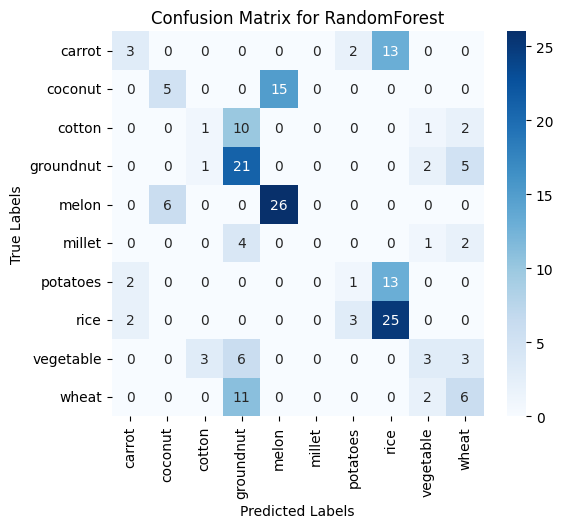


Training XGBoost...


c:\crop\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.39
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.11      0.06      0.07        18
           1       0.43      0.30      0.35        20
           2       0.25      0.07      0.11        14
           3       0.38      0.59      0.46        29
           4       0.63      0.75      0.69        32
           5       0.00      0.00      0.00         7
           6       0.13      0.12      0.13        16
           7       0.42      0.57      0.49        30
           8       0.18      0.13      0.15        15
           9       0.29      0.37      0.33        19

    accuracy                           0.39       200
   macro avg       0.28      0.30      0.28       200
weighted avg       0.34      0.39      0.35       200

Confusion Matrix for XGBoost:
 [[ 1  0  0  0  0  0  5 12  0  0]
 [ 0  6  0  0 14  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  1  3]
 [ 0  0  2 17  0  0  0  0  2  8]
 [ 0  8  0  0 24  0

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


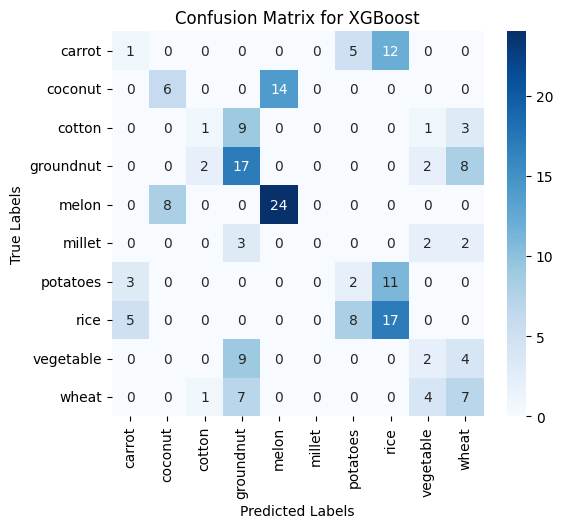


Training SVM...
SVM Accuracy: 0.46
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        14
           3       0.35      1.00      0.51        29
           4       0.62      1.00      0.76        32
           5       0.00      0.00      0.00         7
           6       0.50      0.12      0.20        16
           7       0.48      0.97      0.64        30
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        19

    accuracy                           0.46       200
   macro avg       0.19      0.31      0.21       200
weighted avg       0.26      0.46      0.31       200

Confusion Matrix for SVM:
 [[ 0  0  0  0  0  0  1 17  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


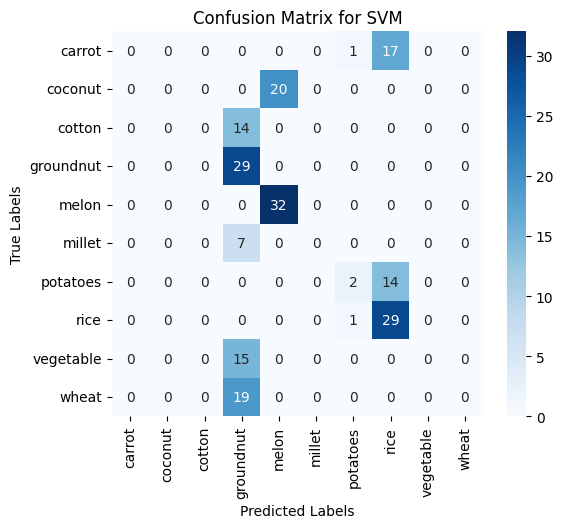


Training DecisionTree...
DecisionTree Accuracy: 0.39
Classification Report for DecisionTree:
               precision    recall  f1-score   support

           0       0.23      0.17      0.19        18
           1       0.60      0.60      0.60        20
           2       0.12      0.14      0.13        14
           3       0.29      0.34      0.32        29
           4       0.75      0.75      0.75        32
           5       0.11      0.14      0.12         7
           6       0.25      0.31      0.28        16
           7       0.48      0.50      0.49        30
           8       0.30      0.20      0.24        15
           9       0.21      0.16      0.18        19

    accuracy                           0.39       200
   macro avg       0.34      0.33      0.33       200
weighted avg       0.39      0.39      0.39       200

Confusion Matrix for DecisionTree:
 [[ 3  0  0  0  0  0  7  8  0  0]
 [ 0 12  0  0  8  0  0  0  0  0]
 [ 0  0  2  7  0  3  0  0  0  2]
 [ 0  0  7 

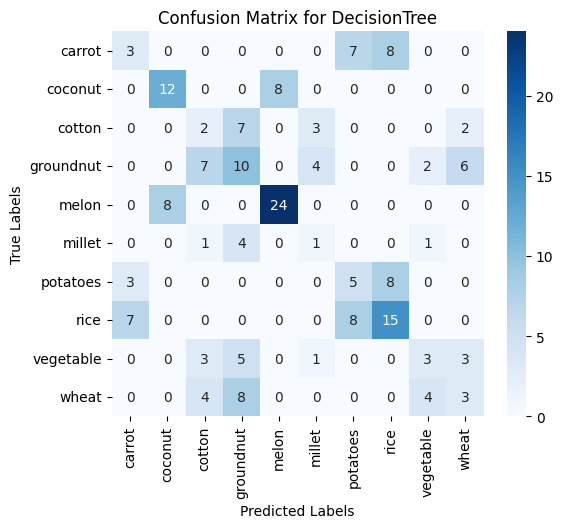


Training LogisticRegression...
LogisticRegression Accuracy: 0.49
Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       1.00      0.10      0.18        20
           2       0.00      0.00      0.00        14
           3       0.35      0.97      0.52        29
           4       0.64      1.00      0.78        32
           5       0.00      0.00      0.00         7
           6       0.60      0.19      0.29        16
           7       0.51      0.97      0.67        30
           8       0.50      0.07      0.12        15
           9       0.67      0.11      0.18        19

    accuracy                           0.49       200
   macro avg       0.48      0.34      0.28       200
weighted avg       0.52      0.49      0.38       200

Confusion Matrix for LogisticRegression:
 [[ 1  0  0  0  0  0  1 16  0  0]
 [ 0  2  0  0 18  0  0  0  0  0]
 [ 0  0  0 13  0  0 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


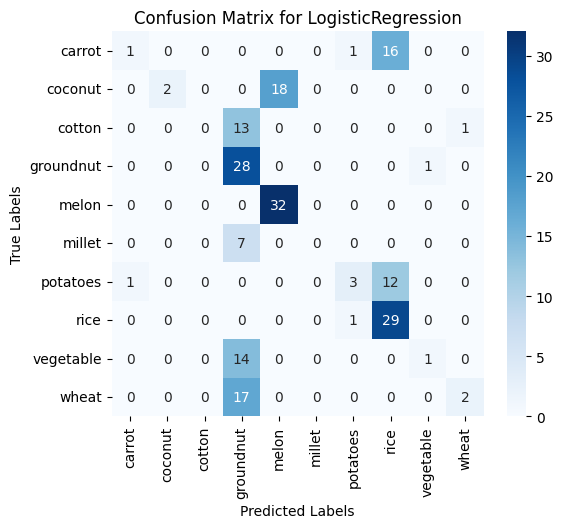

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming you have already defined your features (X_train, X_test) and target (y_train, y_test)

# Label encode the target labels if they are categorical (e.g., 'carrot', 'coconut', etc.)
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform y_test
y_test_encoded = label_encoder.transform(y_test)

# Define different models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(kernel='rbf', probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  # Train model with encoded labels
    
    y_pred = model.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Print Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test_encoded, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    
    # Print Confusion Matrix
    print(f"Confusion Matrix for {name}:\n", cm)
    
    # Plotting the Confusion Matrix as a Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



Training RandomForest...
RandomForest Accuracy: 0.46
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.43      0.17      0.24        18
           1       0.45      0.25      0.32        20
           2       0.20      0.07      0.11        14
           3       0.40      0.72      0.52        29
           4       0.63      0.81      0.71        32
           5       0.00      0.00      0.00         7
           6       0.17      0.06      0.09        16
           7       0.49      0.83      0.62        30
           8       0.33      0.20      0.25        15
           9       0.33      0.32      0.32        19

    accuracy                           0.46       200
   macro avg       0.34      0.34      0.32       200
weighted avg       0.40      0.46      0.40       200

Confusion Matrix for RandomForest:
 [[ 3  0  0  0  0  0  2 13  0  0]
 [ 0  5  0  0 15  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  1  2]
 [ 0  0  1 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


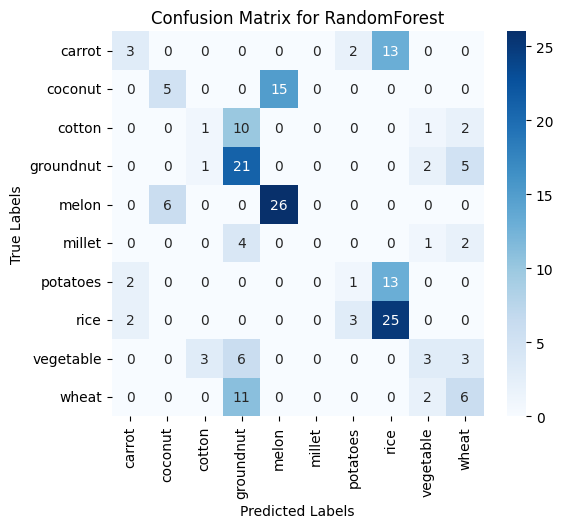


Training XGBoost...


c:\crop\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.39
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.11      0.06      0.07        18
           1       0.43      0.30      0.35        20
           2       0.25      0.07      0.11        14
           3       0.38      0.59      0.46        29
           4       0.63      0.75      0.69        32
           5       0.00      0.00      0.00         7
           6       0.13      0.12      0.13        16
           7       0.42      0.57      0.49        30
           8       0.18      0.13      0.15        15
           9       0.29      0.37      0.33        19

    accuracy                           0.39       200
   macro avg       0.28      0.30      0.28       200
weighted avg       0.34      0.39      0.35       200

Confusion Matrix for XGBoost:
 [[ 1  0  0  0  0  0  5 12  0  0]
 [ 0  6  0  0 14  0  0  0  0  0]
 [ 0  0  1  9  0  0  0  0  1  3]
 [ 0  0  2 17  0  0  0  0  2  8]
 [ 0  8  0  0 24  0

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


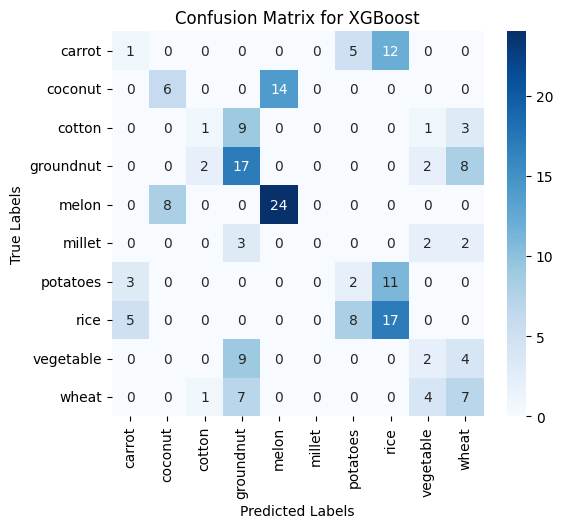


Training SVM...
SVM Accuracy: 0.46
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        14
           3       0.35      1.00      0.51        29
           4       0.62      1.00      0.76        32
           5       0.00      0.00      0.00         7
           6       0.50      0.12      0.20        16
           7       0.48      0.97      0.64        30
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        19

    accuracy                           0.46       200
   macro avg       0.19      0.31      0.21       200
weighted avg       0.26      0.46      0.31       200

Confusion Matrix for SVM:
 [[ 0  0  0  0  0  0  1 17  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


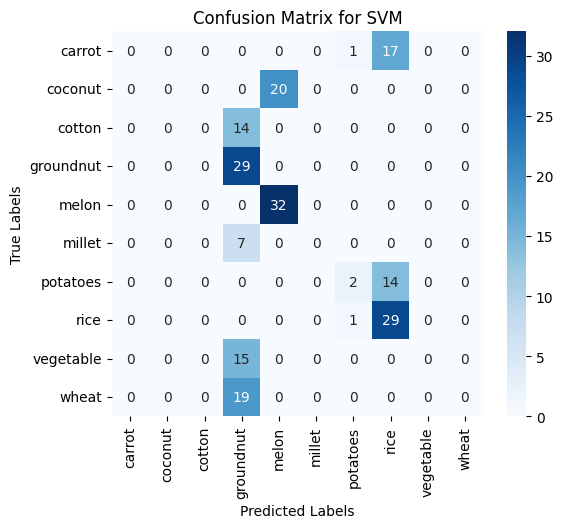


Training DecisionTree...
DecisionTree Accuracy: 0.39
Classification Report for DecisionTree:
               precision    recall  f1-score   support

           0       0.23      0.17      0.19        18
           1       0.60      0.60      0.60        20
           2       0.12      0.14      0.13        14
           3       0.29      0.34      0.32        29
           4       0.75      0.75      0.75        32
           5       0.11      0.14      0.12         7
           6       0.25      0.31      0.28        16
           7       0.48      0.50      0.49        30
           8       0.30      0.20      0.24        15
           9       0.21      0.16      0.18        19

    accuracy                           0.39       200
   macro avg       0.34      0.33      0.33       200
weighted avg       0.39      0.39      0.39       200

Confusion Matrix for DecisionTree:
 [[ 3  0  0  0  0  0  7  8  0  0]
 [ 0 12  0  0  8  0  0  0  0  0]
 [ 0  0  2  7  0  3  0  0  0  2]
 [ 0  0  7 

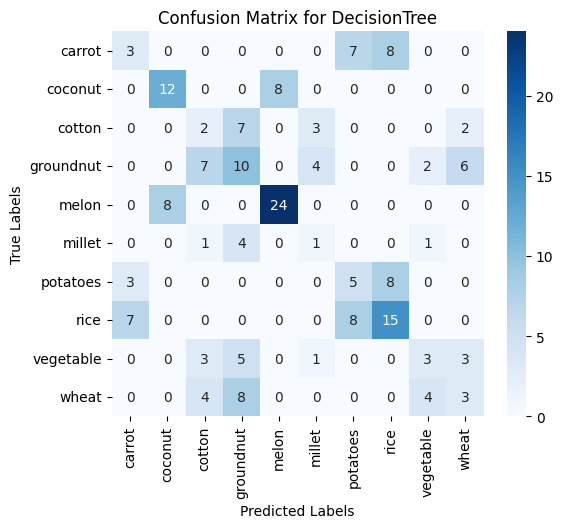


Training LogisticRegression...
LogisticRegression Accuracy: 0.49
Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       1.00      0.10      0.18        20
           2       0.00      0.00      0.00        14
           3       0.35      0.97      0.52        29
           4       0.64      1.00      0.78        32
           5       0.00      0.00      0.00         7
           6       0.60      0.19      0.29        16
           7       0.51      0.97      0.67        30
           8       0.50      0.07      0.12        15
           9       0.67      0.11      0.18        19

    accuracy                           0.49       200
   macro avg       0.48      0.34      0.28       200
weighted avg       0.52      0.49      0.38       200

Confusion Matrix for LogisticRegression:
 [[ 1  0  0  0  0  0  1 16  0  0]
 [ 0  2  0  0 18  0  0  0  0  0]
 [ 0  0  0 13  0  0 

c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\crop\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


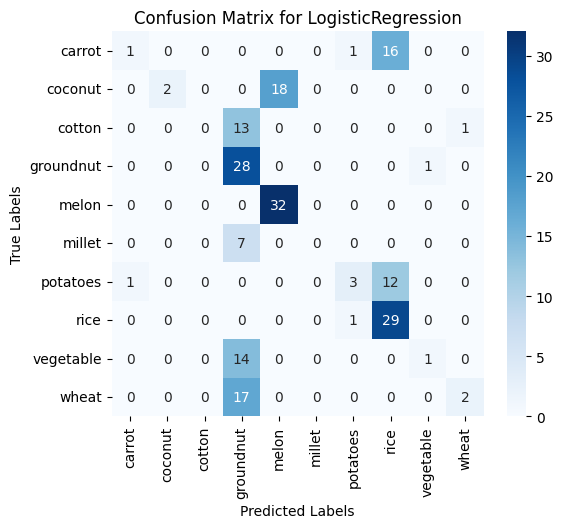

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming you have already defined your features (X_train, X_test) and target (y_train, y_test)

# Label encode the target labels if they are categorical (e.g., 'carrot', 'coconut', etc.)
label_encoder = LabelEncoder()

# Fit and transform y_train
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform y_test
y_test_encoded = label_encoder.transform(y_test)

# Define different models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVM": SVC(kernel='rbf', probability=True),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train_encoded)  # Train model with encoded labels
    
    y_pred = model.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Print Classification Report
    print(f"Classification Report for {name}:\n", classification_report(y_test_encoded, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    
    # Print Confusion Matrix
    print(f"Confusion Matrix for {name}:\n", cm)
    
    # Plotting the Confusion Matrix as a Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [91]:
import joblib
model_filename = f"{name}_model.pkl"
joblib.dump(model, model_filename)
print(f"{name} model saved as {model_filename}")


LogisticRegression model saved as LogisticRegression_model.pkl
